# Practical 8 (Part III) - Recommender System (Collaborative Filtering)

Recommender systems are algorithms aimed at suggesting relevant items to users. Collaborative filtering based solely on the past interactions recorded between users and items in order to produce new recommendations. These interactions are stored in the so-called “user-item interactions matrix”. This practical demonstrates how to build a recommender system that identify movies to view based on collaborative filtering method.

## Section 1 Data Preparation

1. Reading data from files

"file.tsv" contains 100,003 rows of records that store the user ratings as shown in the table below.

| user_id | item_id | rating | timestamp |
| --- | --- | --- | --- |
|0 | 50 |	5 |	881250949|
|0 | 172 |	5 |	881250949|
|0 | 133 |	1 |	881250949|
|196 | 242 | 3 | 881250949|
|186 | 302 | 3 | 891717742|

On the other hand, "Movie_Id_Titles.csv" contains 1682 movie titles associated with their item_id.

In [2]:
# import pandas library
import pandas as pd

# Get the data
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

path = 'file.tsv'

# tsv is tab-separated values file
df = pd.read_csv(path, sep='\t', names=column_names)

# Check the head of the data
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
# Check out all the movies and their respective IDs
movie_titles = pd.read_csv('Movie_Id_Titles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


<hr/>
2. Now let's merge these 2 files together.
<hr/>

In [4]:
data = pd.merge(df, movie_titles, on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


<hr/>
3. We need to group the movie titles and view their ratings in the descending order.
<hr/>

In [5]:
# Calculate mean rating of all movies
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

,rating
title,
Aiqing wansui (1994),5.0
Entertaining Angels: The Dorothy Day Story (1996),5.0
Santa with Muscles (1996),5.0
Prefontaine (1997),5.0
They Made Me a Criminal (1939),5.0


## Section 2 Data Exploration

4 . Let's observe the top rated movies

In [6]:
# Calculate count rating of all movies
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

,rating
title,
Star Wars (1977),584
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


In [7]:
data.groupby('title').count().info()

<class 'pandas.core.frame.DataFrame'>
Index: 1664 entries, 'Til There Was You (1997) to Á köldum klaka (Cold Fever) (1994)
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    1664 non-null   int64
 1   item_id    1664 non-null   int64
 2   rating     1664 non-null   int64
 3   timestamp  1664 non-null   int64
dtypes: int64(4)
memory usage: 65.0+ KB


5. We can observe that there are 1664 movies with rating. Let's calculate the average rating of each movie

In [8]:
# creating dataframe with 'rating' count values
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
print(ratings)

#add another column called "num of ratings" that count the total rating
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
print(ratings['num of ratings'])

                                         rating
title                                          
'Til There Was You (1997)              2.333333
1-900 (1994)                           2.600000
101 Dalmatians (1996)                  2.908257
12 Angry Men (1957)                    4.344000
187 (1997)                             3.024390
...                                         ...
Young Guns II (1990)                   2.772727
Young Poisoner's Handbook, The (1995)  3.341463
Zeus and Roxanne (1997)                2.166667
unknown                                3.444444
Á köldum klaka (Cold Fever) (1994)     3.000000

[1664 rows x 1 columns]
title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The

6. Let's create a histogram to check out the number of ratings received against the count

<Axes: >

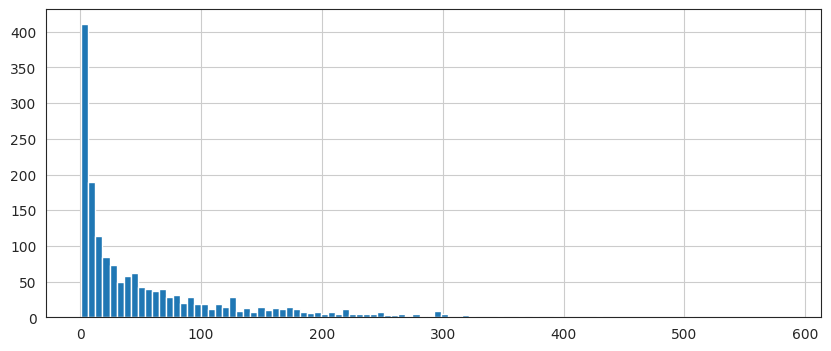

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

# plot graph of 'num of ratings column'
plt.figure(figsize =(10, 4))

ratings['num of ratings'].hist(bins = 100)

From the histogram, we can observe that majority of the movies (more than 500) obtained less than 10 ratings

<Axes: >

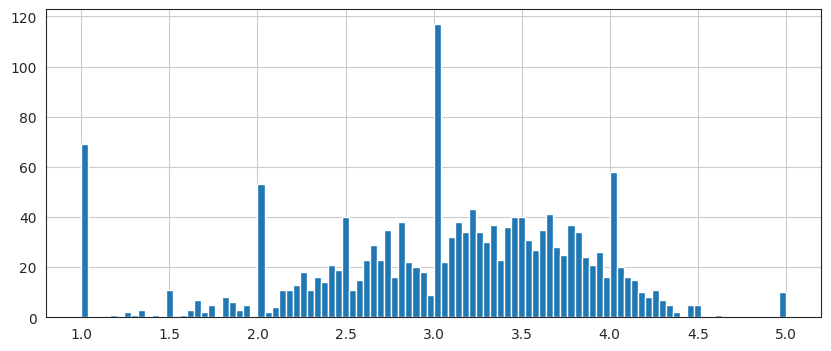

In [10]:
# plot graph of 'ratings' column
plt.figure(figsize =(10, 4))

ratings['rating'].hist(bins = 100)

From the histogram, we can observe that majority of the movies (more than120) obtained a rating around 3.

## Section 3 Building User-Item Interactions Matrix

User-item matrix is a basic foundation of traditional collaborative filtering techniques. In this practical, the rating for target movie item i for an active user can be predicted by using a simple weighted average (mean).

7. Let's build the user-item matrix

In [12]:
# Sorting values according to the 'num of rating column'
moviemat = data.pivot_table(index ='user_id',
              columns ='title', values ='rating')

moviemat.head()

# ratings.sort_values('num of ratings', ascending = False).head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


8. Now check out the Star Wars movie

In [13]:
# analysing correlation with similar movies
starwars_user_ratings = moviemat['Star Wars (1977)']
starwars_user_ratings

,Star Wars (1977)
user_id,
0,5.0
1,5.0
2,5.0
3,NaN
4,5.0
...,...
939,NaN
940,4.0
941,NaN


9. We are interested to find out movies with similar ratings

In [14]:
# analysing correlation with similar movies
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation'])
corr_starwars.dropna(inplace = True)

corr_starwars.head()

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [15]:
# Similar movies like starwars
corr_starwars.sort_values('Correlation', ascending = False).head(10)
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


## Exercise

Perform steps in <b>Section 3</b> to recommend similar movies to the user if he likes

1) Liar Liar (1997)

2) Return of the Jedi (1983)